In [1]:
import random
from matplotlib import pyplot as plt
import importlib
import numpy as np
import numpy.linalg as LA
import math
import Statistics.distributions as distributions

plt.style.use('ggplot')
# importlib.reload(distributions)

random.seed(0)

# Random Variable

In [2]:
rv1 = distributions.RandomVariable([1,2,3,4])
print(rv1.states(), rv1.probability(1), rv1.new(), rv1.expectation(), sep='\n')

[1, 2, 3, 4]
0.25
4
2.5


# Probability Distribution

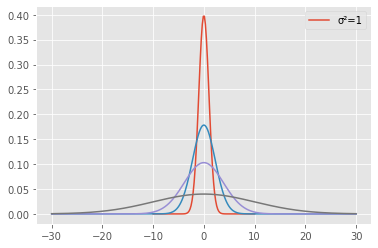

In [3]:
distributions.gaussian().show(10, label="σ²=1")
distributions.gaussian(0, 5).show(30)
distributions.gaussian(0, 15).show(30)
distributions.gaussian(0, 100).show(30)
plt.legend(loc='best')

# Machine Learning

## Linear Regression

In [4]:
def normal_equations(data, predictions, decay_strength=0):
    data = pad_bias(data)
    data_inv = LA.inv(data.T @ data + decay_strength) 
    return data_inv @ data.T @ predictions

In [5]:
def pad_bias(matrix):
    """Pad each row end with a 1 to act as a bias."""
    return np.pad(matrix, ((0,0), (0, 1)), constant_values=1)

In [6]:
def MSE(data, predictions, weights):
    return (1/data.shape[0]) * LA.norm(pad_bias(data) @ weights - predictions)

In [7]:
def train(data, predictions):
    weights = normal_equations(data, predictions)
    return weights, MSE(data, predictions, weights)

In [8]:
def cross_validation(data, predictions, folds=5):
    if data.shape[0] < folds:
        raise Error('Not enough data')
    if data.size != predictions.size:
        raise Error('Each data must have a prediction.')
        
    fold_length = data.shape[0] // folds
    mse = 0
    for i in range(folds):
        start = i * fold_length
        stop = (i+1) * fold_length
        mask = np.ones(len(data), dtype=bool)
        mask[start:stop] = False
        
        test = data[start:stop], predictions[start:stop]
        training = data[mask], predictions[mask]

        weights = normal_equations(*training)
        mse += MSE(*test, weights) / folds
    
    return mse, normal_equations(data, predictions)

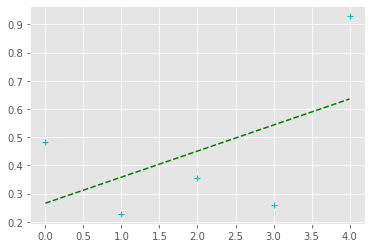

In [9]:
n = 5
data = np.arange(n).reshape(n, 1)
predictions = np.random.rand(n)

mse, weights = cross_validation(data, predictions)
model_predictions = pad_bias(data) @ weights
plt.plot(data, predictions, '+c')
plt.plot(data, model_predictions, '--g')

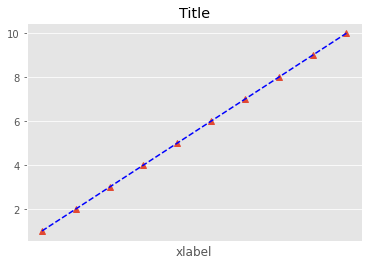

In [10]:
n = 10
weights, mse = train(np.arange(n).reshape(n, 1), np.arange(1, n+1))

inputs = np.arange(10).reshape(10, 1)
outputs = pad_bias(inputs) @ weights
plt.xlabel("xlabel")
plt.title("Title")
plt.xticks([])
plt.plot(inputs, outputs, '^')
plt.plot(inputs, outputs, 'b--')
plt.show()

## Support Vector Machine

## Principle Component Analysis

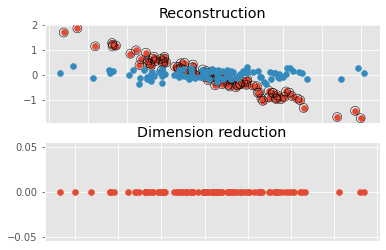

In [11]:
size = 100
x1 = np.random.normal(0, 1, size).T
x2 = np.random.normal(0, 0.1, size).T

rotation = 4
transform = np.array([
    [5 * math.cos(rotation), 1 * -math.sin(rotation)], 
    [1 * math.sin(rotation), 2 * math.cos(rotation)]
])
X = np.vstack((x1, x2)).T @ transform

(evalue, evector) = LA.eig(X.T @ X)
i = np.argmax(evalue) # corresponds to the index of the largest eigenvalue
C = X @ evector[i]  # dimensiality reduction
Y = X @ evector  # encoding
Z = Y @ evector.T  # decoding

fig, axs = plt.subplots(2)
axs[0].scatter(X[:,0], X[:,1])
axs[0].scatter(Z[:,0], Z[:,1], s=80, facecolors='none', edgecolors='black')
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
axs[0].set_title("Reconstruction")
axs[1].scatter(C, np.zeros(size))
axs[1].set_title("Dimension reduction")
axs[0].scatter(Y[:,0], Y[:,1])
axs[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

## K-nearest neighbor

In [12]:
def k_nearest(x, X, Y, k=1):
    dif = np.square(X-x)
    idx = (dif).argsort()[:k]
    err = 1/ (dif[idx] + 1e-5)
    return (err @ Y[idx]) / np.sqrt(err@err)

700 490000 490015.92489168834


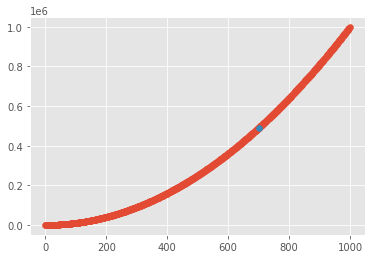

In [13]:
size = 1000
X = np.arange(size)
Y = np.array([x * x for x in X])

x = 700
plt.scatter(X, Y)

prediction = k_nearest(x, X, Y, k=100)
plt.scatter(x, prediction)
print(x, x**2, prediction)

## K-means clustering

In [14]:
def k_means(X, k=3):
    amin, amax = np.amin(X), np.amax(X)
    centroids = np.random.rand(k) * (amax-amin) + amin
    for _ in range(10):
        groups = [[] for _ in range(k)]
        for x in X:
            idx = np.argmin((centroids-x) ** 2)
            groups[idx].append(x)
        for i, group in enumerate(groups):
            centroids[i] = np.mean(np.array(group))
    return centroids

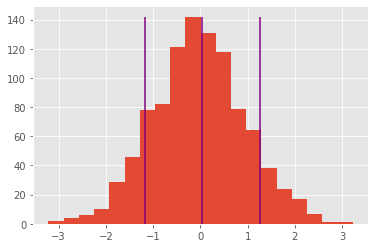

In [15]:
X = np.random.normal(0, 1, 1000)
centroids = k_means(X)
(histy, histx, _) = plt.hist(X, bins=20)
plt.vlines(centroids, 0, histy.max(), colors=['purple'])

# Deep learning

## XOR

In [16]:
class Model:
    def __init__(self):
        self.layers = []
    
    def add(self, layer):
        self.layers.append(layer)
        
    def __call__(self, X):
        for layer in self.layers:
            X = layer(X)
        return X

In [17]:
class FeedForward:
    def __init__(self, weights, bias=0, activation=lambda x: x):
        self.weights = weights
        self.bias = bias
        self.activation = activation
    
    def __call__(self, X):
        X = X @ self.weights.T + self.bias
        return self.activation(X)

In [18]:
def ReLU(X):
    return X * (X > 0)

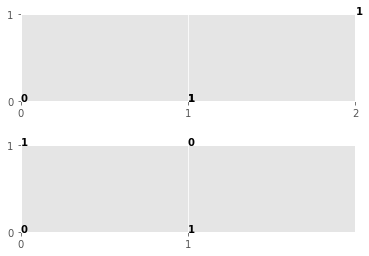

In [19]:
model = Model()
model.add(FeedForward(np.array([[1, 1], [1, 1]]), np.array([0, -1]), ReLU))
model.add(FeedForward(np.array([1, -2])))

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
H = model.layers[0](X)
Y = model(X)

fig, axs = plt.subplots(2)
plt.setp(axs, xticks=[0, 1, 2], yticks=[0, 1])
plt.subplots_adjust(hspace=0.5)
plt.setp(axs[1], xticks=[0,1])

for [x1, x2] in H:
    axs[0].text(x1, x2, int(x1 != x2), fontweight='bold')
    
for i, [x1, x2] in enumerate(X):
    axs[1].text(x1, x2, Y[i], fontweight='bold')

# MNIST

## Download dataset

In [21]:
import os
import urllib.request
import gzip
import re
import numpy as np

dataset_dir = "./datasets/DigitsMNIST-test/"
train_label_path = "train-labels-idx1-ubyte.gz"
test_label_path = "t10k-labels-idx1-ubyte.gz"
train_data_path = "train-images-idx3-ubyte.gz"
test_data_path = "t10k-images-idx3-ubyte.gz"


In [22]:
def gunzip(path):
    gunzip_path = re.sub(r'\.gz$', '', path)
    
    if os.path.exists(gunzip_path):
        return
    
    with gzip.open(path, 'rb') as f:
        content = f.read()
    with open(gunzip_path, 'wb') as f:
        f.write(content)
    
    return gunzip_path

def download_url(url, download_dir):
    download_name = url.split('/')[-1]
    download_path = os.path.join(download_dir, download_name)
    
    if os.path.exists(download_path):
        return
    if not os.path.isdir(download_dir):
        os.makedirs(download_dir)
    
    with urllib.request.urlopen(url) as f:
        content = f.read()
    with open(download_path, 'wb') as f:
        f.write(content)
        
    return download_path
            
def download_dataset():
    root = "http://yann.lecun.com/exdb/mnist/"
    paths = [ test_label_path, test_data_path, train_label_path, train_data_path ]
    for path in paths:
        download_url(root + path, dataset_dir)
        gunzip(dataset_dir + path)


In [23]:
download_dataset()

## Read datasets

In [24]:
def bti(byte): return int.from_bytes(byte, "big", signed=False)

class DataLoader:
    def __init__(self, label_path, data_path):
        self.label_path = label_path
        self.data_path = data_path

        with open(label_path, 'rb') as f:
            self.labels = f.read()

        with open(data_path, 'rb') as f:
            self.data = f.read()
        self.rows = bti(self.data[8:12])
        self.columns = bti(self.data[12:16])
        self.data_size = self.rows * self.columns

        self.total_items = bti(self.labels[4:8])

    def __getitem__(self, key):
        label = self.labels[key + 8]
        data = np.frombuffer(self.data[key * self.data_size + 16: (key + 1) * self.data_size + 16], dtype=np.ubyte) / 255
        return label, data

    def __iter__(self):
        self.n = 0
        return self

    def __next__(self):
        if self.n == self.data_size:
            raise StopIteration
        self.n += 1
        return self[self.n - 1]


/tmp/ipykernel_2182286/1553413291.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


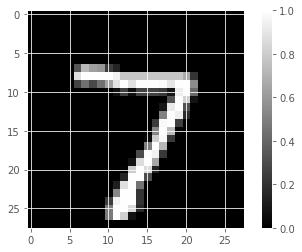

In [25]:
def to_path(path): return dataset_dir + re.sub(r'\.gz$', '', path)
test = DataLoader(to_path(test_label_path), to_path(test_data_path))
train = DataLoader(to_path(train_label_path), to_path(train_data_path))

image = test[0][1]
test[0][0], plt.imshow(np.reshape(image, (28, 28)), cmap='gray')
plt.colorbar()

## Model

In [8]:
import model
import numpy as np

In [9]:
model = model.Model()
label, data = test[0]
print(label)
res = model(data)

print(np.argmax(res))

NameError: name 'np' is not defined

## Training

### SGD